In [ ]:
!pip install yfinance -q
!pip install --upgrade paramiko -q
import yfinance as yf
import plotly
import plotly.express as px
import cufflinks as cf
cf.go_offline()
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [3]:
#downloading finance data from yahoo finance
BAC = yf.download('BAC', start, end)              #Bank of America
C = yf.download('C', start, end)                  #CitiGroup
GS = yf.download('GS', start, end)                #Goldman Sachs
JPM = yf.download('JPM', start, end)              #JPMorgan Chase
MS = yf.download('MS', start, end)                #Morgan Stanley
WFC = yf.download('WFC', start, end)              #Wells Fargo

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
#list of the ticker symbols (as strings) in alphabetical order.
tickers = ['BAC C GS JPM MS WFC'][0].split()
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [5]:
#concatenate the bank dataframes together
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  32.168694  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  31.827057  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  31.868063  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  31.820223  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  31.840719  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  33.585464  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  33.608494  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  33.700653  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  33.735214  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  34.092308  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.369595  11016400  
2006-01-04   31.530001  19.144926  10870000  
2006-01-05   31.495001  19.123678  10158000  
2006-01-06   31.680000  19.236010   8403800  
2006-01-09   31.674999  19.232979   5619600  

[5 rows x 36 columns]

In [7]:
## EDA 

In [8]:
#max Close price for each bank's stock
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [9]:
returns = pd.DataFrame()

In [10]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


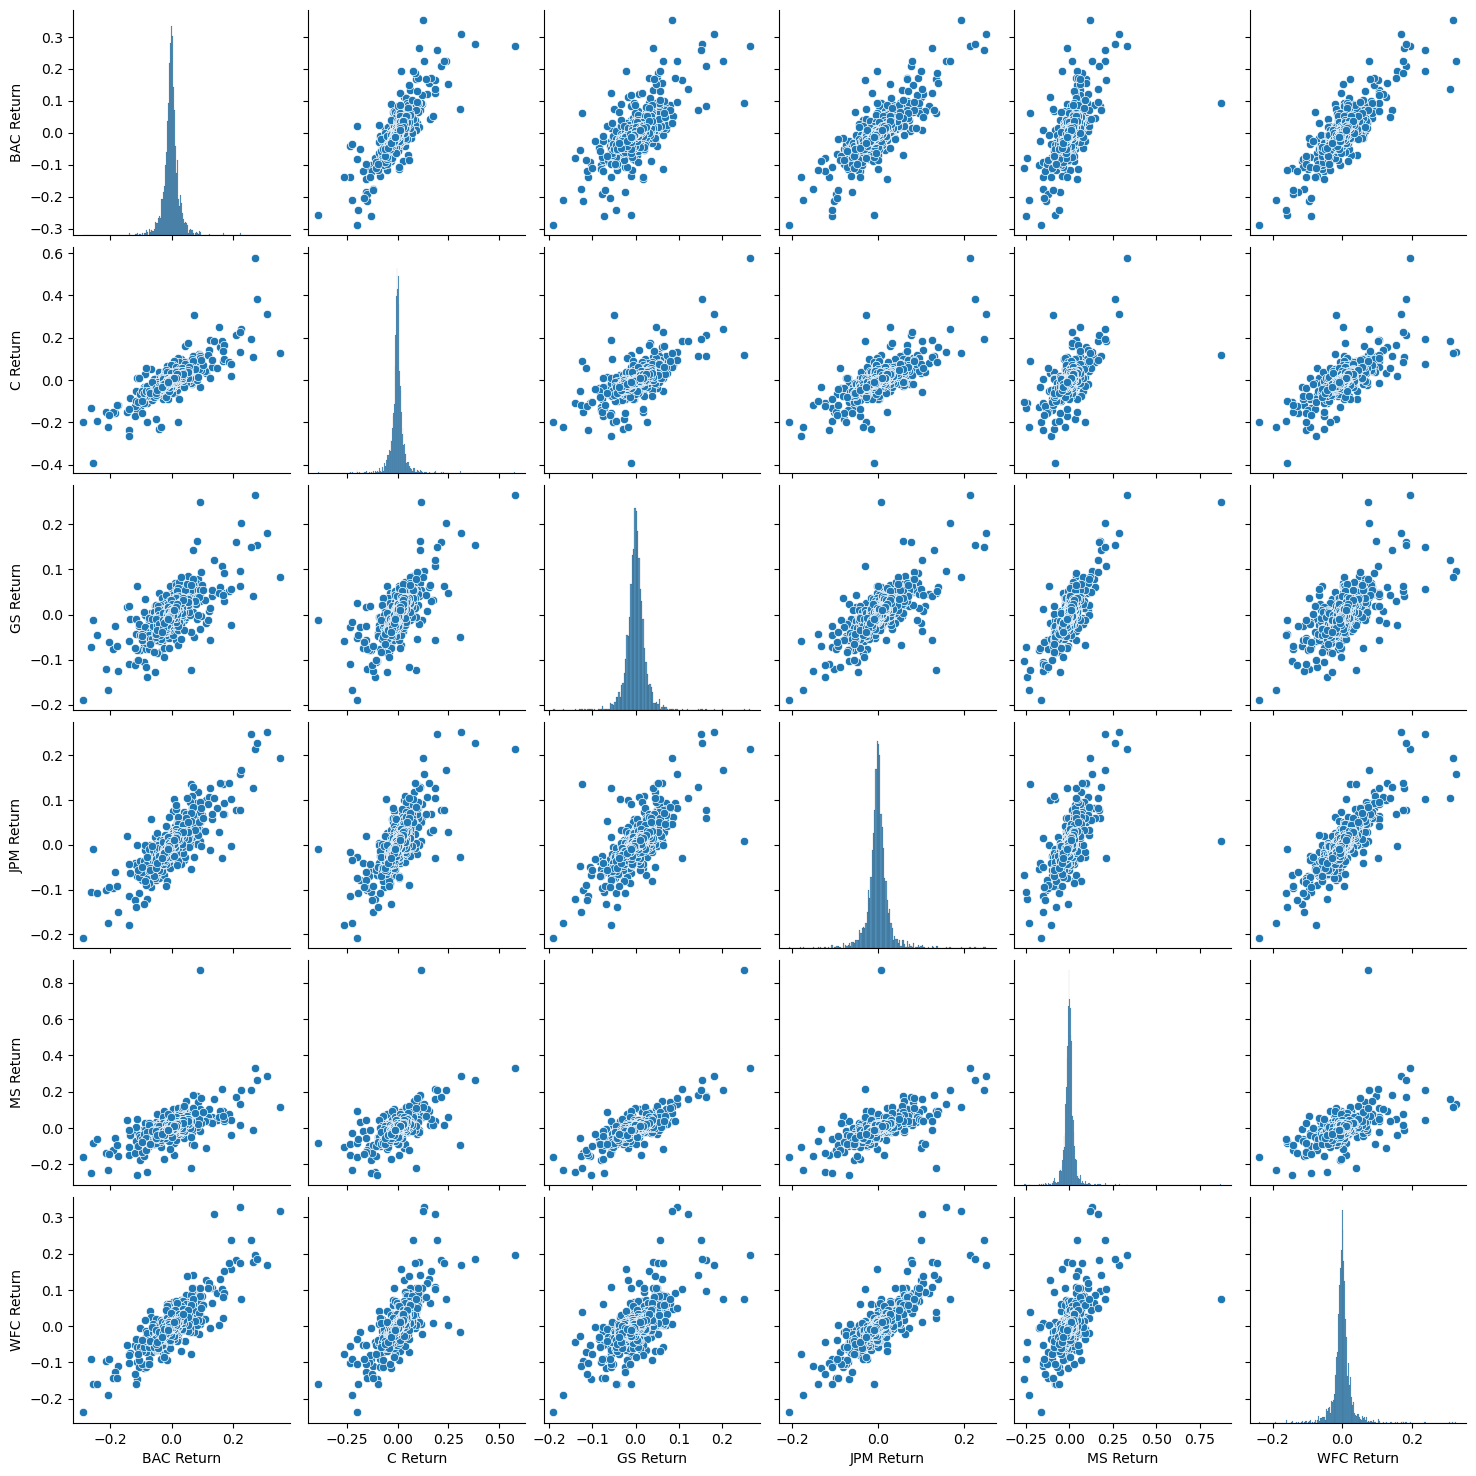

In [11]:
sns.pairplot(returns)

In [12]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

* See Solution for details

In [13]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [14]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [15]:
returns.loc['2015-1-1':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

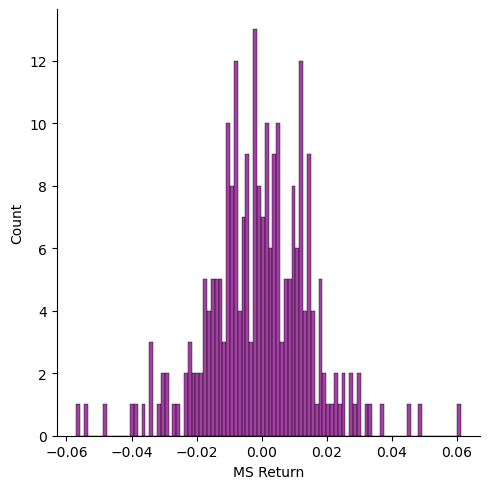

In [16]:
sns.displot(returns.loc['2015-1-1':'2015-12-31']['MS Return'],color='purple',bins=100)

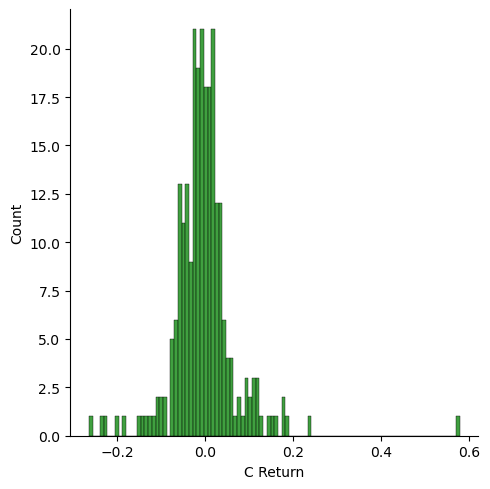

In [17]:
sns.displot(returns.loc['2008-1-1':'2008-12-31']['C Return'],color='green',bins=100)

In [18]:
#Close price for each bank
import plotly.express as px

close_prices = bank_stocks.xs(key='Close', axis=1, level='Stock Info')

fig = px.line(close_prices, x=close_prices.index, y=close_prices.columns,
              title='Close Prices of Bank Stocks', labels={'value': 'Close Price'},
              width=850, height=400)

fig.show()

In [19]:
#rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008
close_prices1 = bank_stocks.xs(key='Close', axis=1, level='Stock Info')
boa_2008 = close_prices1['BAC']['2008-01-01':'2008-12-31']
rolling_avg = boa_2008.rolling(window=30).mean()

fig = px.line(title='Close Prices and 30-Day Rolling Average for Bank Of America (2008)',
              x=boa_2008.index, y=[boa_2008, rolling_avg],
              labels={'value': 'Close Price','x':'Date'},
              width=900, height=400)

fig.show()

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

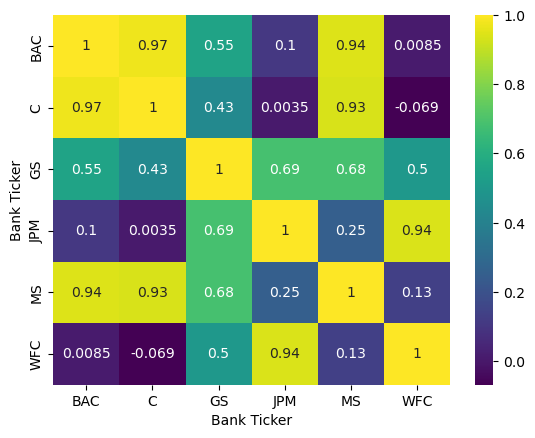

In [20]:
#heatmap of the correlation between the stocks Close Price
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True,cmap='viridis')

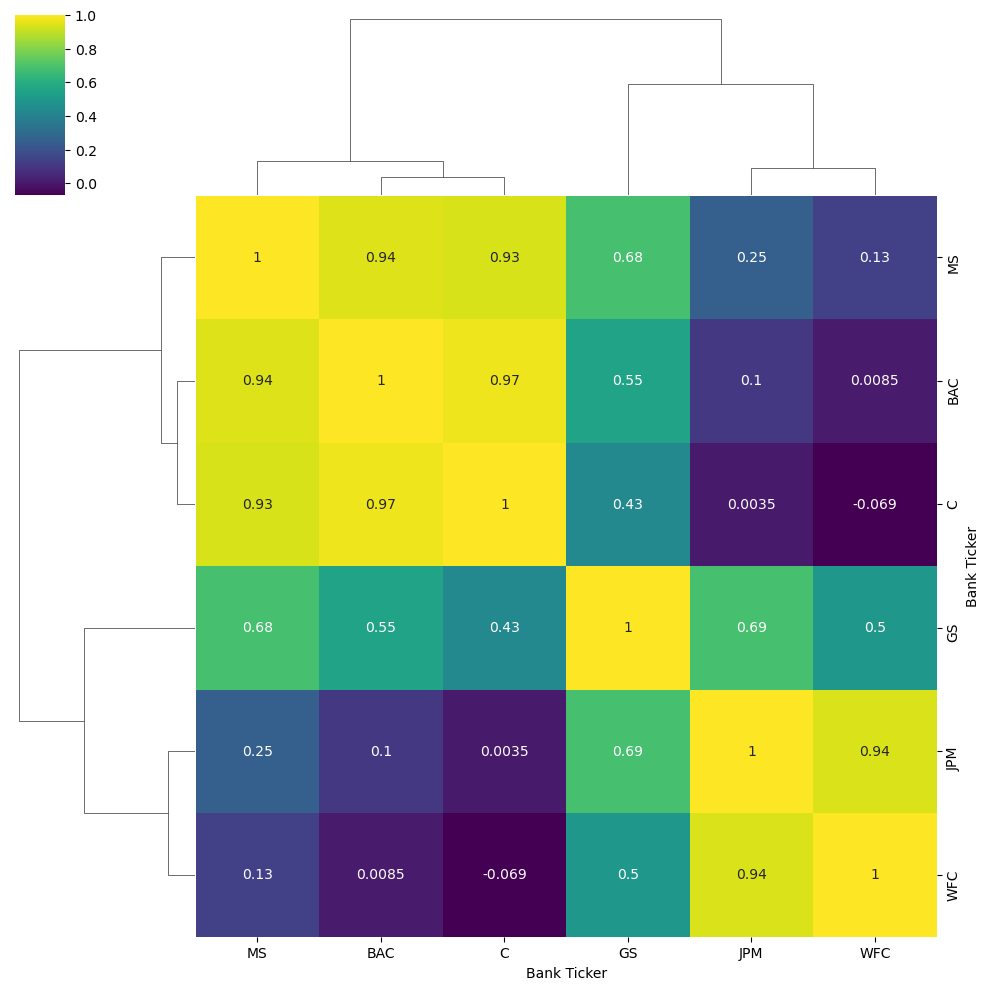

In [21]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True,cmap='viridis')

In [22]:
#candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.
bank_stocks['BAC']['2015-1-1':'2016-1-1'].iplot(kind='candle')